## Análisis de datos - Clase 3

### Taller práctico - análisis completo de un dataset

En esta clase vamos a analizar en forma completa un dataset con datos de Fórmula 1 de la temporada 2024 (los datos fueron extraídos con la biblioteca Fastf1). El dataset contiene información sobre las carreras, los pilotos, los tiempos y los resultados de cada evento.


In [1051]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

1. Importamos los datasets

In [1052]:
# Dataset de carreras del 2024
raw_carreras_24 = pd.read_csv('../datasets/f1_2024_R.csv')

# Dataset de qualifications del 2024
raw_qualis_24 = pd.read_csv('../datasets/f1_2024_Q.csv')

# Dataset de sprints del 2024
raw_sprints_24 = pd.read_csv('../datasets/f1_2024_S.csv')

### EDA (Exploratory Data Analysis)


#### Dimensiones

In [1053]:
raw_carreras_24.shape, raw_qualis_24.shape, raw_sprints_24.shape

((26606, 40), (7590, 40), (2418, 40))

#### Columnas y tipos de datos

In [1054]:
raw_carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26606 entries, 0 to 26605
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              26606 non-null  object 
 1   DriverNumber        26606 non-null  int64  
 2   LapTime             26381 non-null  float64
 3   LapNumber           26606 non-null  float64
 4   Stint               26606 non-null  float64
 5   PitOutTime          840 non-null    object 
 6   PitInTime           849 non-null    object 
 7   Sector1Time         26066 non-null  float64
 8   Sector2Time         26574 non-null  float64
 9   Sector3Time         26553 non-null  float64
 10  Sector1SessionTime  26008 non-null  object 
 11  Sector2SessionTime  26574 non-null  object 
 12  Sector3SessionTime  26553 non-null  object 
 13  SpeedI1             22460 non-null  float64
 14  SpeedI2             26552 non-null  float64
 15  SpeedFL             25728 non-null  float64
 16  Spee

In [1055]:
raw_carreras_24.columns

Index(['Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'EventName', 'SessionType',
       'EventDate', 'Time_weather', 'AirTemp', 'TrackTemp', 'Humidity',
       'AvgSpeed', 'MaxThrottle', 'AvgBrake'],
      dtype='object')

In [1056]:
# Armamos un nuevo dataset con menos columnas para el anaàlisis

carreras_24 = raw_carreras_24.drop(columns=['Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
        'SessionType', 'AvgSpeed', 'MaxThrottle', 'AvgBrake'], axis=1)


In [1057]:
carreras_24.shape

(26606, 33)

In [1058]:
carreras_24.columns

Index(['Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1',
       'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound',
       'TyreLife', 'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate',
       'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'EventName', 'EventDate',
       'Time_weather', 'AirTemp', 'TrackTemp', 'Humidity'],
      dtype='object')


### Detalles de las columnas del dataset

#### Corredor y equipo
* Driver: nombre del piloto
* DriverNumber: número del piloto
* Team: nombre del equipo constructor
* Grid: posición de salida (1,2,3, etc.)

#### Vueltas y tiempos
* PitInLap: tiempo desde el comienzo de la vuelta en el que el piloto entra en boxes (timedelta).
* PinOutLap: tiempo desde el comienzo de la vuelta en el que el piloto sale de boxes (timedelta).
* IsPersonalBest: indica si la vuelta fue la mejor del piloto en la sesión (1,0)
* Stint: indica el cambio de cubiertas (1,2,3, etc.)
* LapTime: tiempo de la vuelta (en segundos)
* LapNumber: número de vuelta (1,2,3, etc.)

#### Telemetría

* SpeedI1, SpeedI2: velocidad en dos puntos intermedio de la vuelta (km/h)
* SpeedFL: velocidad en la línea de meta (km/h)
* SpeedST: velocidad en el speed trap que es el punto más rápido en la recta (km/h)

#### Condiciones climáticas
* AirTemp: temperatura del aire (°C)
* TrackTemp: temperatura de la pista (°C)
* Humidity: humedad (%)

#### Cubiertas
* Compound: tipo de cubierta (Duro, Medio, Blando, de lluvia, etc.)
* TyreLife: vida útil de la cubierta (número de vueltas)
* FreshTyre: indica si la cubierta es nueva o usada (1,0)

#### Contexto

* TrackStatus: las condiciones de la pista (1 para verde, 2 para amarilla, 4 para Safety Car)
* Position: la posición del piloto al final de la vuelta (1,2,3, etc.)
* Deleted: indica si la vuelta fue eliminada (por alguna infracción, por ejemplo, por exceder los límites de la pista)
* DeletedReason: la razon por la que la vuelta fue eliminada (por ejemplo, por exceder los límites de la pista)
* FastF1Generated: indica si los datos fueron generados por FastF1 (por ejemplo, si la telemetría está incompleta)
* IsAccurate: indica si los datos son confiables (por ejemplo, si no hay interpolación)


#### Vista general del dataset

In [1059]:
carreras_24.head(10)

,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,Deleted,DeletedReason,FastF1Generated,IsAccurate,EventName,EventDate,Time_weather,AirTemp,TrackTemp,Humidity
0,VER,1,97.284,1.0,1.0,NaN,NaN,NaN,41.266,23.616,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
1,LEC,16,98.271,1.0,1.0,NaN,NaN,NaN,41.549,23.635,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
2,RUS,63,99.228,1.0,1.0,NaN,NaN,NaN,42.099,23.694,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
3,NOR,4,102.168,1.0,1.0,NaN,NaN,NaN,43.309,24.244,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
4,HAM,44,103.122,1.0,1.0,NaN,NaN,NaN,43.609,24.393,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
5,PIA,81,102.523,1.0,1.0,NaN,NaN,NaN,43.573,24.140,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
6,ALO,14,101.679,1.0,1.0,NaN,NaN,NaN,43.268,24.162,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
7,SAR,2,105.921,1.0,1.0,NaN,NaN,NaN,43.162,24.178,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
8,SAI,55,100.620,1.0,1.0,NaN,NaN,NaN,42.861,23.765,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0
9,ZHO,24,104.801,1.0,1.0,NaN,NaN,NaN,43.576,24.294,...,False,NaN,False,False,Bahrain Grand Prix,2024-03-02,3614.115,18.2,23.8,49.0


In [1060]:
carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26606 entries, 0 to 26605
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Driver           26606 non-null  object 
 1   DriverNumber     26606 non-null  int64  
 2   LapTime          26381 non-null  float64
 3   LapNumber        26606 non-null  float64
 4   Stint            26606 non-null  float64
 5   PitOutTime       840 non-null    object 
 6   PitInTime        849 non-null    object 
 7   Sector1Time      26066 non-null  float64
 8   Sector2Time      26574 non-null  float64
 9   Sector3Time      26553 non-null  float64
 10  SpeedI1          22460 non-null  float64
 11  SpeedI2          26552 non-null  float64
 12  SpeedFL          25728 non-null  float64
 13  SpeedST          24422 non-null  float64
 14  IsPersonalBest   26591 non-null  object 
 15  Compound         26606 non-null  object 
 16  TyreLife         26606 non-null  float64
 17  FreshTyre   

In [1061]:
carreras_24['TyreLife'].unique()

array([ 4.,  1.,  5.,  2.,  6.,  3.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.])

#### Ajustamos los tipos de datos

In [1062]:
# Categóricas
carreras_24['EventName'] = carreras_24['EventName'].astype('category')
carreras_24['Driver'] = carreras_24['Driver'].astype('category')
carreras_24['DriverNumber'] = carreras_24['DriverNumber'].astype('category')
carreras_24['Team'] = carreras_24['Team'].astype('category')
carreras_24['FreshTyre'] = carreras_24['FreshTyre'].astype('category')
carreras_24['TyreLife'] = carreras_24['TyreLife'].astype('category')
carreras_24['Compound'] = carreras_24['Compound'].astype('category')
carreras_24['Stint'] = carreras_24['Stint'].astype('category')
carreras_24['IsPersonalBest'] = carreras_24['IsPersonalBest'].astype('category')
carreras_24['Deleted'] = carreras_24['Deleted'].astype('category')
carreras_24['DeletedReason'] = carreras_24['DeletedReason'].astype('category')


# Numéricas temporales
carreras_24['EventDate'] = pd.to_datetime(carreras_24['EventDate'])
carreras_24['LapTime'] = pd.to_timedelta(carreras_24['LapTime'])
carreras_24['PitInTime'] = pd.to_timedelta(carreras_24['PitInTime'])
carreras_24['PitOutTime'] = pd.to_timedelta(carreras_24['PitOutTime'])
carreras_24['Sector1Time'] = pd.to_timedelta(carreras_24['Sector1Time'])
carreras_24['Sector2Time'] = pd.to_timedelta(carreras_24['Sector2Time'])
carreras_24['Sector3Time'] = pd.to_timedelta(carreras_24['Sector3Time'])

# Numéricas discretas
carreras_24['LapNumber'] = carreras_24['LapNumber'].astype('int')


#### Variables numéricas: estadística descriptiva

In [1063]:
carreras_24.describe()

,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,LapStartTime,TrackStatus,Position,EventDate,Time_weather,AirTemp,TrackTemp,Humidity
count,26381,26606.000000,840,849,26066,26574,26553,22460.000000,26552.000000,25728.000000,24422.000000,26606.000000,26606.000000,26578.000000,26606,26606.000000,26606.000000,26606.000000,26606.000000
mean,0 days 00:00:00.000000092,30.507931,0 days 01:37:42.147103571,0 days 01:36:26.654181389,0 days 00:00:00.000000028,0 days 00:00:00.000000034,0 days 00:00:00.000000027,254.994167,247.649292,268.093711,296.643928,6191.722126,7.034090,9.793325,2024-07-20 19:42:45.165752064,6191.860156,23.490434,35.588191,54.358303
min,0 days 00:00:00.000000067,1.000000,0 days 00:04:17.809000,0 days 00:15:20.353000,0 days 00:00:00.000000016,0 days 00:00:00.000000017,0 days 00:00:00.000000017,59.000000,57.000000,1.000000,64.000000,245.608000,1.000000,1.000000,2024-03-02 00:00:00,246.621000,14.500000,16.700000,30.000000
25%,0 days 00:00:00.000000081,15.000000,0 days 01:18:31.260750,0 days 01:16:58.954000,0 days 00:00:00.000000025,0 days 00:00:00.000000029,0 days 00:00:00.000000023,214.000000,211.000000,248.000000,289.000000,4707.357750,1.000000,5.000000,2024-05-19 00:00:00,4703.094000,19.200000,28.700000,45.000000
50%,0 days 00:00:00.000000089,30.000000,0 days 01:38:21.220500,0 days 01:38:45.781000,0 days 00:00:00.000000028,0 days 00:00:00.000000032,0 days 00:00:00.000000025,273.000000,257.000000,275.000000,302.000000,6136.312500,1.000000,10.000000,2024-07-07 00:00:00,6134.155000,22.000000,37.000000,53.000000
75%,0 days 00:00:00.000000098,45.000000,0 days 01:53:11.494750,0 days 01:53:19.090000,0 days 00:00:00.000000031,0 days 00:00:00.000000041,0 days 00:00:00.000000031,289.000000,280.000000,291.000000,313.000000,7584.237750,1.000000,14.000000,2024-09-22 00:00:00,7581.674000,28.300000,43.500000,63.000000
max,0 days 00:00:00.000002526,78.000000,0 days 03:11:24.136000,0 days 03:10:59.688000,0 days 00:00:00.000000097,0 days 00:00:00.000000090,0 days 00:00:00.000000097,357.000000,343.000000,357.000000,362.000000,11925.420000,2671.000000,20.000000,2024-12-08 00:00:00,11903.549000,33.900000,51.700000,92.000000
std,0 days 00:00:00.000000060,18.260169,0 days 00:24:21.070185,0 days 00:24:02.916710214,0 days 00:00:00.000000006,0 days 00:00:00.000000007,0 days 00:00:00.000000007,45.269851,43.887292,34.744874,31.732479,1929.832188,66.696792,5.430816,NaN,1929.959971,4.789366,9.032689,13.877374


#### Variables categóricas: exploración

In [1064]:
carreras_24.describe(include='category')

,Driver,DriverNumber,Stint,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,Deleted,DeletedReason,EventName
count,26606,26606,26606.0,26591,26606,26606.0,26606,26606,26606,326,26606
unique,24,25,5.0,2,6,78.0,2,10,2,255,24
top,PIA,81,2.0,False,HARD,4.0,True,McLaren,False,TRACK LIMITS AT TURN 1 LAP 10,Dutch Grand Prix
freq,1444,1444,11438.0,21094,13767,1162.0,21042,2881,26280,5,1426


In [1065]:
# Pilotos que corrieron en el 2024
carreras_24['Driver'].unique()

['VER', 'LEC', 'RUS', 'NOR', 'HAM', ..., 'STR', 'BEA', 'COL', 'LAW', 'DOO']
Length: 24
Categories (24, object): ['ALB', 'ALO', 'BEA', 'BOT', ..., 'STR', 'TSU', 'VER', 'ZHO']

In [1066]:
# Constructores que participaron en el 2024
carreras_24['Team'].unique()

['Red Bull Racing', 'Ferrari', 'Mercedes', 'McLaren', 'Aston Martin', 'Williams', 'Kick Sauber', 'RB', 'Haas F1 Team', 'Alpine']
Categories (10, object): ['Alpine', 'Aston Martin', 'Ferrari', 'Haas F1 Team', ..., 'Mercedes', 'RB', 'Red Bull Racing', 'Williams']

In [1067]:
# ¿En cuántos equipos estuvo cada piloto?
teams = carreras_24.groupby('Driver')['Team'].nunique().reset_index()

teams

/var/folders/9g/1rg076zs24z9q_glz2_80vsw0000gn/T/ipykernel_29472/1626503831.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  teams = carreras_24.groupby('Driver')['Team'].nunique().reset_index()


,Driver,Team
0,ALB,1
1,ALO,1
2,BEA,2
3,BOT,1
4,COL,1
5,DOO,1
6,GAS,1
7,HAM,1
8,HUL,1
9,LAW,1


In [1068]:
# Tipo de cubiertas
carreras_24['Compound'].unique()

['SOFT', 'HARD', 'MEDIUM', 'INTERMEDIATE', 'WET', 'UNKNOWN']
Categories (6, object): ['HARD', 'INTERMEDIATE', 'MEDIUM', 'SOFT', 'UNKNOWN', 'WET']

In [1069]:
# Pilotos por equipo
equipos = carreras_24[['Driver', 'Team']].drop_duplicates().sort_values(by='Team').reset_index(drop=True)

equipos.head(25)

,Driver,Team
0,DOO,Alpine
1,GAS,Alpine
2,OCO,Alpine
3,ALO,Aston Martin
4,STR,Aston Martin
5,SAI,Ferrari
6,BEA,Ferrari
7,LEC,Ferrari
8,BEA,Haas F1 Team
9,HUL,Haas F1 Team


In [1070]:
# Grand Prix que se corrieron en el 2024
carreras_24['EventName'].unique()

['Bahrain Grand Prix', 'Saudi Arabian Grand Prix', 'Australian Grand Prix', 'Japanese Grand Prix', 'Chinese Grand Prix', ..., 'Mexico City Grand Prix', 'São Paulo Grand Prix', 'Las Vegas Grand Prix', 'Qatar Grand Prix', 'Abu Dhabi Grand Prix']
Length: 24
Categories (24, object): ['Abu Dhabi Grand Prix', 'Australian Grand Prix', 'Austrian Grand Prix', 'Azerbaijan Grand Prix', ..., 'Singapore Grand Prix', 'Spanish Grand Prix', 'São Paulo Grand Prix', 'United States Grand Prix']

In [1071]:
# Total de carreras en las que participó cada piloto

driver_events = carreras_24.groupby('Driver')['EventName'].nunique().reset_index()
driver_events = driver_events.sort_values(ascending=False, by='EventName')

driver_events


/var/folders/9g/1rg076zs24z9q_glz2_80vsw0000gn/T/ipykernel_29472/3375100916.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driver_events = carreras_24.groupby('Driver')['EventName'].nunique().reset_index()


,Driver,EventName
12,NOR,24
10,LEC,24
22,VER,24
21,TSU,24
20,STR,24
17,RUS,24
15,PIA,24
14,PER,24
1,ALO,24
23,ZHO,24


### Visualización de datos

In [1072]:
# fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# ax[0].hist(carreras_24['Sector1Time'])
# ax[1].hist(carreras_24['Sector2Time'])
# ax[2].hist(carreras_24['Sector3Time'])

# plt.show()

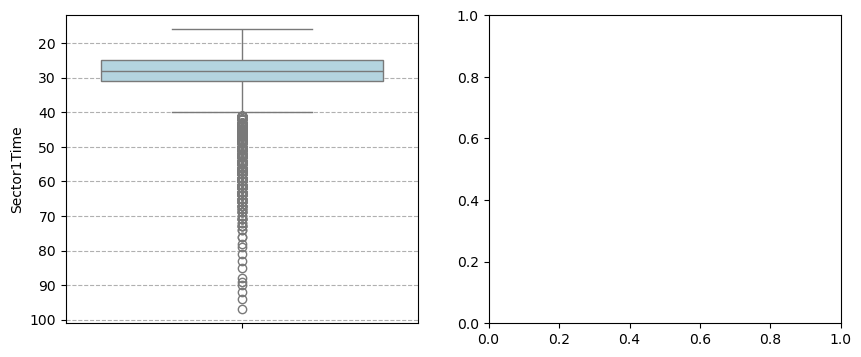

In [1073]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=carreras_24, y='Sector1Time', color="lightblue", ax=ax[0])

ax[0].grid(axis='y', ls='--')

plt.show()

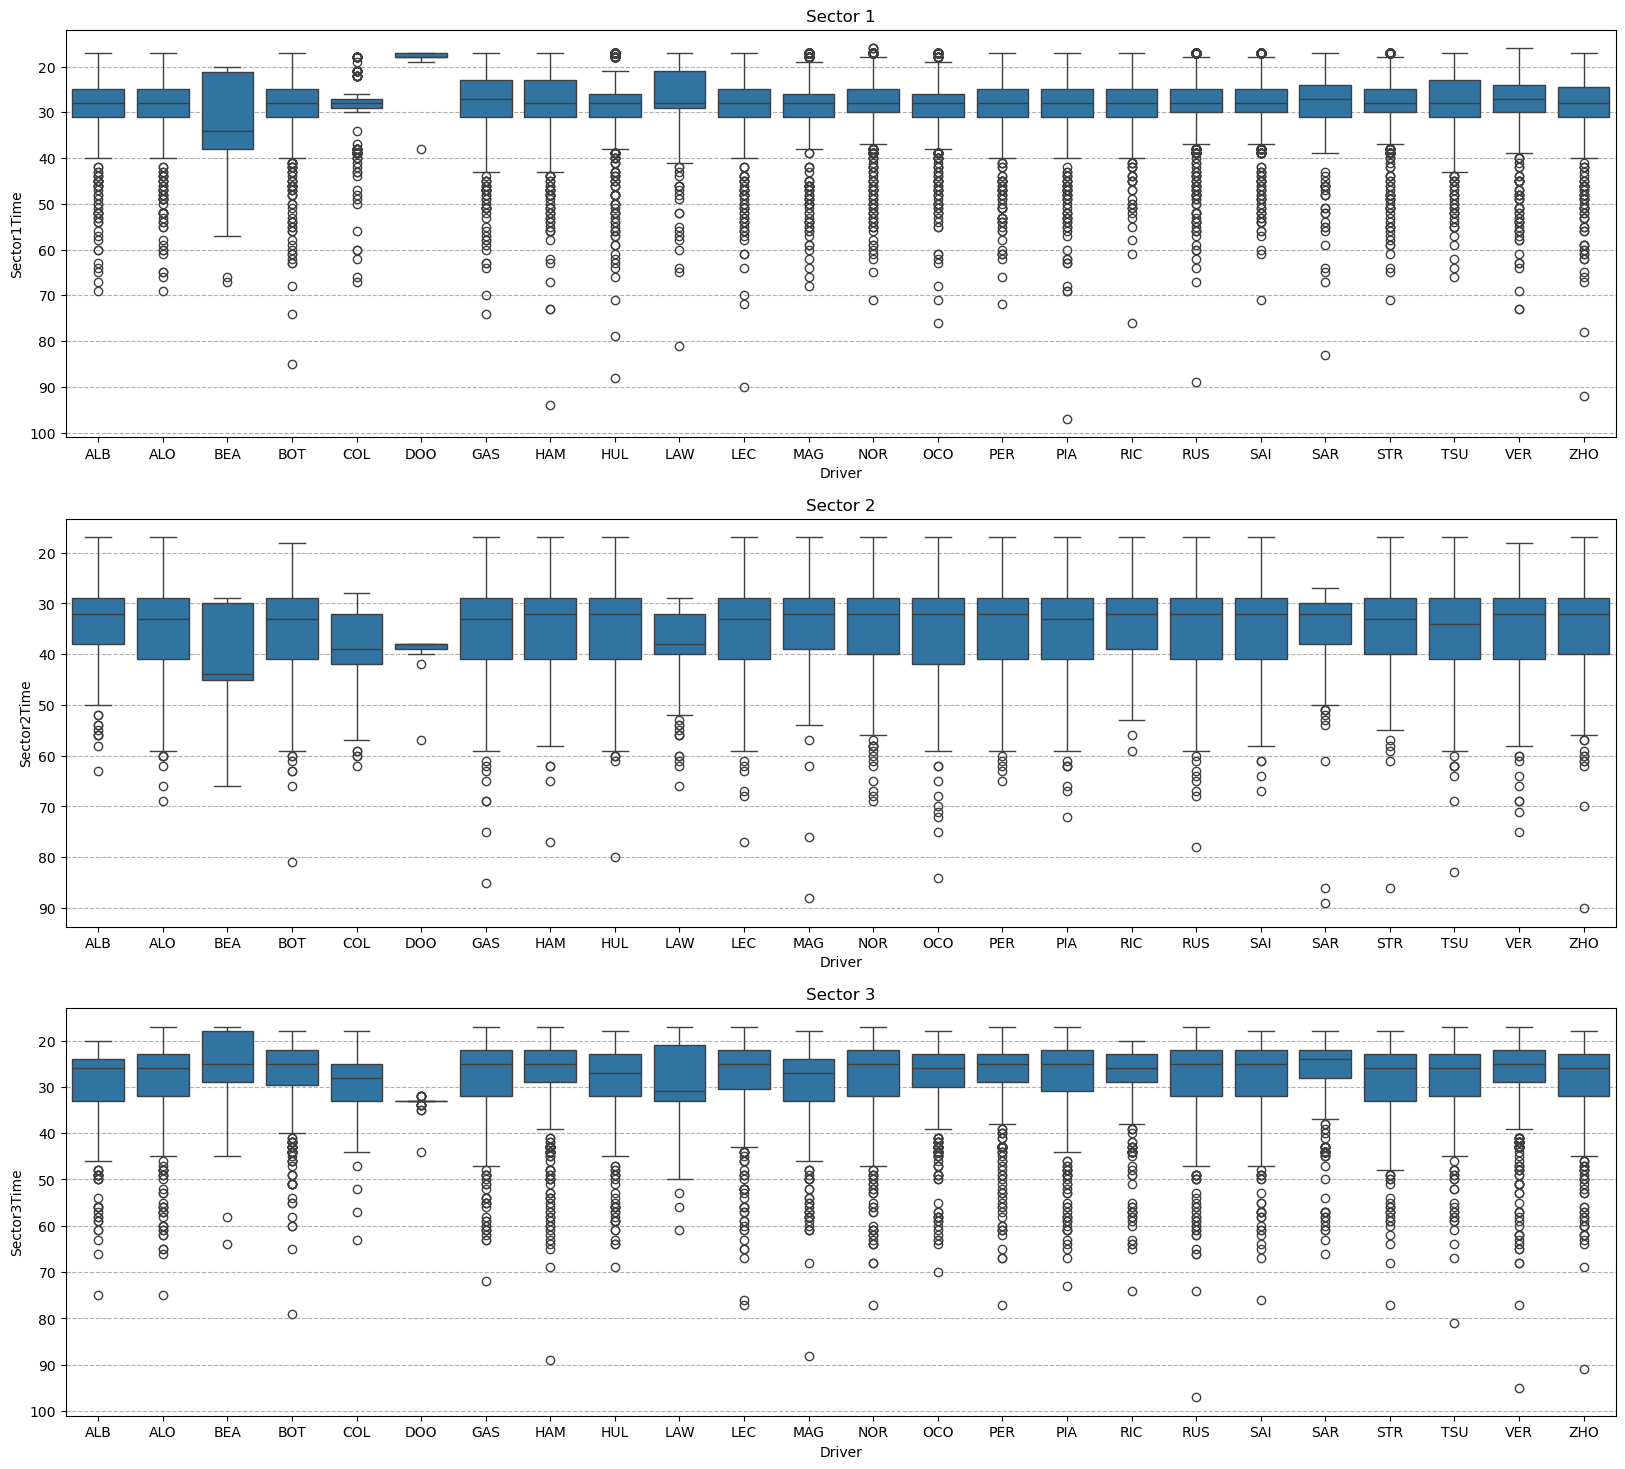

In [1074]:
fig, ax = plt.subplots(3, 1,figsize=(20, 18))

sns.boxplot(data=carreras_24, y='Sector1Time', x='Driver', ax=ax[0])
sns.boxplot(data=carreras_24, y='Sector2Time', x='Driver', ax=ax[1])
sns.boxplot(data=carreras_24, y='Sector3Time', x='Driver', ax=ax[2])

for i in (0,1,2):
    ax[i].grid(axis='y', ls='--')
    ax[i].set_title(f'Sector {i+1}')

plt.show()

In [1075]:
def scatter(driver, race='all'):
    if race == 'all':
        df = carreras_24[carreras_24['Driver']==driver]
    else:
        df = carreras_24[(carreras_24['Driver']==driver) & (carreras_24['EventName']==race)]

    plt.figure(figsize=(10, 5))
    plt.scatter(df['LapStartDate'], df['Sector1Time'], label='Sector 1', alpha=0.7)
    plt.scatter(df['LapStartDate'], df['Sector2Time'], label='Sector 2', alpha=0.7)
    plt.scatter(df['LapStartDate'], df['Sector3Time'], label='Sector 3', alpha=0.7)

    plt.xlabel('')
    plt.ylabel('Time')
    plt.title(f'Tiempos por sector - Piloto: {driver} - Carrera(s):{race}')
    plt.legend()
    plt.xticks(ticks=plt.xticks()[0], labels=[''] * len(plt.xticks()[0]))
    plt.show()

In [1076]:
# scatter('DOO')

In [1077]:
# scatter('NOR', 'Australian Grand Prix')

In [1078]:
# scatter('LEC', 'Australian Grand Prix')

In [1079]:
# scatter('MAG')

### Datos faltantes

In [1080]:
# Serie con los valores faltantes
faltantes = carreras_24.isnull().sum()

# Calculamos porcentaje de valores faltantes
total_filas = len(carreras_24)
faltantes_df = faltantes.to_frame(name='faltantes')
faltantes_df['porcentaje'] = ((faltantes_df['faltantes'] / total_filas) * 100).round(2)
faltantes_df = faltantes_df.sort_values(by='faltantes', ascending=False)

# Mostramos solo las que tienen valores faltantes
faltantes_df[faltantes_df['faltantes'] > 0]

,faltantes,porcentaje
DeletedReason,26280,98.77
PitOutTime,25766,96.84
PitInTime,25757,96.81
SpeedI1,4146,15.58
SpeedST,2184,8.21
SpeedFL,878,3.30
Sector1Time,540,2.03
LapTime,225,0.85
SpeedI2,54,0.20
Sector3Time,53,0.20


#### Análisis de nulos de PitInTime y PitOutTime 

Los pilotos están obligados a hacer al menos 1 parada en boxes por carrera. Los datos de PitInTime y PitOutTime son nulos para las vueltas que no tienen parada en boxes. 

¿Qué hacemos en este caso?
- Opción 1: reemplazar con 0s los nulos. Problema: son columnas que indican tiempos!
- Opción 2: crear 2 nuevas columnas: Boxes (True/False) y PitTime (PitInTime - PitOutTime). PitTime tendrá valores 0 para aquellas vueltas que no tienen parada en boxes. 

In [1081]:
# Cantidad de filas que no tienen nulos
PitInTime_no_nulos = total_filas-faltantes['PitInTime']
PitOutTime_no_nulos = total_filas-faltantes['PitOutTime']

print(f'Cantidad de entradas a boxes: {PitInTime_no_nulos}, cantidad de salidas de boxes: {PitOutTime_no_nulos}')

Cantidad de entradas a boxes: 849, cantidad de salidas de boxes: 840


In [1082]:
carreras_24[(carreras_24['PitInTime'].notnull()) & (carreras_24['PitOutTime'].notnull())].head(10)

,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,Deleted,DeletedReason,FastF1Generated,IsAccurate,EventName,EventDate,Time_weather,AirTemp,TrackTemp,Humidity
3245,ZHO,24,0 days 00:00:00.000000128,12,4.0,0 days 01:50:27.076000,0 days 01:52:08.494000,0 days 00:00:00.000000059,0 days 00:00:00.000000046,0 days 00:00:00.000000021,...,False,NaN,False,False,Japanese Grand Prix,2024-04-07,6580.853,21.9,37.1,40.0
6252,ALB,23,NaT,9,2.0,0 days 01:07:15.914000,0 days 01:09:28.708000,0 days 00:00:00.000000060,0 days 00:00:00.000000047,0 days 00:00:00.000000054,...,False,NaN,False,False,Emilia Romagna Grand Prix,2024-05-19,4019.515,25.1,40.4,51.0
23058,ZHO,24,0 days 00:00:00.000000126,28,2.0,0 days 01:51:55.386000,0 days 01:53:35.972000,0 days 00:00:00.000000044,0 days 00:00:00.000000053,0 days 00:00:00.000000027,...,False,NaN,False,False,São Paulo Grand Prix,2024-11-03,6683.239,21.6,24.2,86.0
23119,HUL,27,NaT,30,4.0,0 days 01:58:44.080000,0 days 02:01:05.310000,0 days 00:00:00.000000050,0 days 00:00:00.000000060,0 days 00:00:00.000000063,...,False,NaN,False,False,São Paulo Grand Prix,2024-11-03,7103.288,20.8,23.2,89.0
23127,ZHO,24,NaT,32,4.0,0 days 02:22:03.366000,0 days 02:23:53.295000,NaT,0 days 00:00:00.000000054,0 days 00:00:00.000000031,...,False,NaN,False,False,São Paulo Grand Prix,2024-11-03,7223.318,20.6,23.7,90.0
23915,OCO,31,0 days 00:00:00.000000114,12,2.0,0 days 01:15:16.298000,0 days 01:16:55.566000,0 days 00:00:00.000000038,0 days 00:00:00.000000033,0 days 00:00:00.000000042,...,False,NaN,False,False,Las Vegas Grand Prix,2024-11-23,4521.376,17.9,17.7,51.0
24773,STR,18,0 days 00:00:00.000000140,8,3.0,0 days 01:09:18.818000,0 days 01:10:57.663000,0 days 00:00:00.000000071,0 days 00:00:00.000000032,0 days 00:00:00.000000036,...,False,NaN,False,False,Qatar Grand Prix,2024-12-01,4136.267,19.0,22.9,54.0
25230,HAM,44,NaT,35,2.0,0 days 01:48:31.837000,0 days 01:50:51.672000,0 days 00:00:00.000000073,0 days 00:00:00.000000050,0 days 00:00:00.000000053,...,False,NaN,False,False,Qatar Grand Prix,2024-12-01,6476.289,18.5,22.1,57.0
25231,VER,1,NaT,36,2.0,0 days 01:48:29.321000,0 days 01:50:50.228000,0 days 00:00:00.000000063,0 days 00:00:00.000000052,0 days 00:00:00.000000053,...,False,NaN,False,False,Qatar Grand Prix,2024-12-01,6476.289,18.5,22.1,57.0
25232,NOR,4,NaT,36,2.0,0 days 01:48:33.018000,0 days 01:50:54.535000,0 days 00:00:00.000000065,0 days 00:00:00.000000051,0 days 00:00:00.000000053,...,False,NaN,False,False,Qatar Grand Prix,2024-12-01,6476.289,18.5,22.1,57.0


Creamos nueva variable 'PitTime_seconds' que guarda el tiempo de parada en boxes

In [1083]:
carreras_24 = carreras_24.sort_values(by=['EventName', 'Driver', 'LapNumber'])

# PitIn-Out
carreras_24['PitOutTime2'] = carreras_24.groupby(['EventName', 'Driver'])['PitOutTime'].shift(-1)
carreras_24['PitTime'] = carreras_24['PitOutTime2'] - carreras_24['PitInTime']
carreras_24['PitTime_seconds'] = carreras_24['PitTime'].dt.total_seconds()

carreras_24.head()

/var/folders/9g/1rg076zs24z9q_glz2_80vsw0000gn/T/ipykernel_29472/1209287715.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carreras_24['PitOutTime2'] = carreras_24.groupby(['EventName', 'Driver'])['PitOutTime'].shift(-1)


,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsAccurate,EventName,EventDate,Time_weather,AirTemp,TrackTemp,Humidity,PitOutTime2,PitTime,PitTime_seconds
25580,ALB,23,0 days 00:00:00.000000101,1,1.0,NaT,NaT,NaT,0 days 00:00:00.000000040,0 days 00:00:00.000000035,...,False,Abu Dhabi Grand Prix,2024-12-08,3417.160,27.0,32.1,49.0,NaT,NaT,NaN
25605,ALB,23,0 days 00:00:00.000000120,2,1.0,NaT,NaT,0 days 00:00:00.000000018,0 days 00:00:00.000000056,0 days 00:00:00.000000045,...,False,Abu Dhabi Grand Prix,2024-12-08,3537.178,27.0,32.2,49.0,NaT,NaT,NaN
25624,ALB,23,0 days 00:00:00.000000095,3,1.0,NaT,NaT,0 days 00:00:00.000000019,0 days 00:00:00.000000042,0 days 00:00:00.000000033,...,False,Abu Dhabi Grand Prix,2024-12-08,3657.180,27.0,31.8,49.0,NaT,NaT,NaN
25643,ALB,23,0 days 00:00:00.000000090,4,1.0,NaT,NaT,0 days 00:00:00.000000018,0 days 00:00:00.000000037,0 days 00:00:00.000000034,...,True,Abu Dhabi Grand Prix,2024-12-08,3717.199,26.9,31.8,49.0,NaT,NaT,NaN
25662,ALB,23,0 days 00:00:00.000000090,5,1.0,NaT,NaT,0 days 00:00:00.000000018,0 days 00:00:00.000000037,0 days 00:00:00.000000034,...,True,Abu Dhabi Grand Prix,2024-12-08,3837.181,26.9,31.7,50.0,NaT,NaT,NaN


In [1084]:
# Verifico que la nueva columna PitTime no tenga valores nulos
carreras_24[(carreras_24['PitTime_seconds'].notnull())].shape

(824, 36)

Aplico imputación con 0s a los NaN de 'PitTime_seconds' y creo una nueva variable binaria 'Pit' que indica si el piloto hizo una parada en boxes o no. 

In [1085]:
# Creo nueva variable binaria
carreras_24['Pit'] = np.where(carreras_24['PitTime_seconds'].isnull(), 0, 1)

# Verifico que para no nulos en PitTime haya un 1 en Pit
carreras_24[(carreras_24['PitTime_seconds'].notnull())].head()


,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,EventName,EventDate,Time_weather,AirTemp,TrackTemp,Humidity,PitOutTime2,PitTime,PitTime_seconds,Pit
25794,ALB,23,0 days 00:00:00.000000092,12,1.0,NaT,0 days 01:15:40.720000,0 days 00:00:00.000000018,0 days 00:00:00.000000038,0 days 00:00:00.000000035,...,Abu Dhabi Grand Prix,2024-12-08,4437.187,26.8,31.5,51.0,0 days 01:16:02.774000,0 days 00:00:22.054000,22.054,1
25807,ALO,14,0 days 00:00:00.000000093,13,1.0,NaT,0 days 01:17:02.713000,0 days 00:00:00.000000018,0 days 00:00:00.000000039,0 days 00:00:00.000000035,...,Abu Dhabi Grand Prix,2024-12-08,4557.191,26.8,31.6,52.0,0 days 01:17:26.460000,0 days 00:00:23.747000,23.747,1
26248,ALO,14,0 days 00:00:00.000000091,37,2.0,NaT,0 days 01:53:23.943000,0 days 00:00:00.000000017,0 days 00:00:00.000000038,0 days 00:00:00.000000035,...,Abu Dhabi Grand Prix,2024-12-08,6717.344,26.3,30.3,58.0,0 days 01:53:46.293000,0 days 00:00:22.350000,22.350,1
25679,BOT,77,0 days 00:00:00.000000093,6,1.0,NaT,0 days 01:06:36.737000,0 days 00:00:00.000000018,0 days 00:00:00.000000039,0 days 00:00:00.000000035,...,Abu Dhabi Grand Prix,2024-12-08,3897.184,26.8,31.8,50.0,0 days 01:07:17.835000,0 days 00:00:41.098000,41.098,1
25627,COL,43,0 days 00:00:00.000000130,3,1.0,NaT,0 days 01:02:42.334000,0 days 00:00:00.000000019,0 days 00:00:00.000000047,0 days 00:00:00.000000063,...,Abu Dhabi Grand Prix,2024-12-08,3657.180,27.0,31.8,49.0,0 days 01:03:07.286000,0 days 00:00:24.952000,24.952,1


In [1086]:
# Verifico que para nulos en PitTime haya un 0 en Pit
carreras_24[(carreras_24['PitTime_seconds'].isnull())].head()


,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,EventName,EventDate,Time_weather,AirTemp,TrackTemp,Humidity,PitOutTime2,PitTime,PitTime_seconds,Pit
25580,ALB,23,0 days 00:00:00.000000101,1,1.0,NaT,NaT,NaT,0 days 00:00:00.000000040,0 days 00:00:00.000000035,...,Abu Dhabi Grand Prix,2024-12-08,3417.160,27.0,32.1,49.0,NaT,NaT,NaN,0
25605,ALB,23,0 days 00:00:00.000000120,2,1.0,NaT,NaT,0 days 00:00:00.000000018,0 days 00:00:00.000000056,0 days 00:00:00.000000045,...,Abu Dhabi Grand Prix,2024-12-08,3537.178,27.0,32.2,49.0,NaT,NaT,NaN,0
25624,ALB,23,0 days 00:00:00.000000095,3,1.0,NaT,NaT,0 days 00:00:00.000000019,0 days 00:00:00.000000042,0 days 00:00:00.000000033,...,Abu Dhabi Grand Prix,2024-12-08,3657.180,27.0,31.8,49.0,NaT,NaT,NaN,0
25643,ALB,23,0 days 00:00:00.000000090,4,1.0,NaT,NaT,0 days 00:00:00.000000018,0 days 00:00:00.000000037,0 days 00:00:00.000000034,...,Abu Dhabi Grand Prix,2024-12-08,3717.199,26.9,31.8,49.0,NaT,NaT,NaN,0
25662,ALB,23,0 days 00:00:00.000000090,5,1.0,NaT,NaT,0 days 00:00:00.000000018,0 days 00:00:00.000000037,0 days 00:00:00.000000034,...,Abu Dhabi Grand Prix,2024-12-08,3837.181,26.9,31.7,50.0,NaT,NaT,NaN,0


In [1104]:
# Verifico que para nulos en PitTime haya un 0 en Pit
no_pit = len(carreras_24[(carreras_24['Pit']==0)])
is_pit = len(carreras_24[(carreras_24['Pit']==1)])
print(f"Cantidad de filas con Pit=0: {no_pit}")
print(f"Cantidad de filas con Pit=1: {is_pit}")
print(f"Total:{no_pit+is_pit}")

Cantidad de filas con Pit=0: 25782
Cantidad de filas con Pit=1: 824
Total:26606


In [1090]:
# Aplico imputación a los valores nulos 
carreras_24.fillna({col:'PitTime_seconds'}, inplace=True)

# Verifico
carreras_24[(carreras_24['PitTime_seconds'].isnull())].shape


(25782, 38)

#### Creación de otras variables útiles

In [1088]:
# Ganador de cada carrera
winners = carreras_24[carreras_24['Position'] == 1][['EventName', 'Driver']].set_index('EventName')['Driver'].to_dict()
carreras_24['Winner'] = carreras_24['EventName'].map(winners)
carreras_24['Winner'] = carreras_24['Winner'].astype('category')

### ANÁLISIS CON ESTADÍSTICA INFERENCIAL

Problema: quiero determinar cómo la selección del tipo de cubierta, la estrategia (en qué vuelta entra a boxes) y el tiempo de parada afectan la posibilidad de que el piloto mejore su posición al final de la carrera.

Primero, definimos una nueva variable 'ImprovedPosition' de esta forma:

'ImprovedPosition'  = 1 si  'Final Position' < 'InitialPosition' 
'ImprovedPosition'  = 0 en caso contrario

In [1117]:

initial_pos = carreras_24.groupby(['EventName', 'Driver'])['Position'].first()
final_pos = carreras_24.groupby(['EventName', 'Driver'])['Position'].last()
datos_pilotos = pd.DataFrame({
    'InitialPosition': initial_pos,
    'FinalPosition': final_pos
}).reset_index()

# Creo nueva variable binaria 'ImprovedPosition'
datos_pilotos['ImprovedPosition'] = (datos_pilotos['FinalPosition'] < datos_pilotos['InitialPosition']).astype(int).reindex()

/var/folders/9g/1rg076zs24z9q_glz2_80vsw0000gn/T/ipykernel_29472/2636444202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  initial_pos = carreras_24.groupby(['EventName', 'Driver'])['Position'].first()
/var/folders/9g/1rg076zs24z9q_glz2_80vsw0000gn/T/ipykernel_29472/2636444202.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_pos = carreras_24.groupby(['EventName', 'Driver'])['Position'].last()


In [1118]:
# Verifico la nueva variable

datos_pilotos

,EventName,Driver,InitialPosition,FinalPosition,ImprovedPosition
0,Abu Dhabi Grand Prix,ALB,16.0,11.0,1
1,Abu Dhabi Grand Prix,ALO,7.0,9.0,0
2,Abu Dhabi Grand Prix,BEA,NaN,NaN,0
3,Abu Dhabi Grand Prix,BOT,14.0,18.0,0
4,Abu Dhabi Grand Prix,COL,19.0,19.0,0
...,...,...,...,...,...
571,United States Grand Prix,SAR,NaN,NaN,0
572,United States Grand Prix,STR,13.0,15.0,0
573,United States Grand Prix,TSU,8.0,14.0,0
574,United States Grand Prix,VER,2.0,4.0,0


### PREPARACIÓN PARA ENTRENAMIENTO DE MODELOS DE ML

#### Normalización de datos

#### Codificación de variables categóricas

#### Reducción de dimensionalidad